# Air Quality Visualization of India of 6th April, 2025

# Data Loading and Cleaning

In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plotting style
sns.set_theme(style="whitegrid")

# Load data
try:
    df = pd.read_csv('Real time aqi.csv')  # Update with your file name if needed
except FileNotFoundError:
    print("Error: File not found.")
    exit()

# Convert last_update to datetime
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# Convert necessary columns to numeric
numeric_cols = ['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaNs in critical columns
df.dropna(subset=['state', 'city', 'station', 'pollutant_id', 'pollutant_avg'], inplace=True)

# Display basic info and sample
print("Data Summary:")
print(df.describe())
print("\nSample Data:")
print(df.head())


Data Summary:
               last_update     latitude    longitude  pollutant_min  \
count                 3040  3040.000000  3040.000000    3040.000000   
mean   2025-06-04 16:00:00    22.283075    78.742839      23.000987   
min    2025-06-04 16:00:00     8.514909    70.909168       1.000000   
25%    2025-06-04 16:00:00    19.025790    75.521300       5.000000   
50%    2025-06-04 16:00:00    23.076793    77.494094      14.000000   
75%    2025-06-04 16:00:00    26.771495    80.891736      32.000000   
max    2025-06-04 16:00:00    34.066206    94.636574     160.000000   
std                    NaN     5.519440     4.925504      24.673711   

       pollutant_max  pollutant_avg  
count    3040.000000    3040.000000  
mean       87.404276      48.779934  
min         1.000000       1.000000  
25%        20.000000      13.000000  
50%        60.000000      33.000000  
75%       116.000000      69.000000  
max       500.000000     386.000000  
std        92.305518      48.850996  

Sam

# Objective 1
### Pollutant Level Distribution

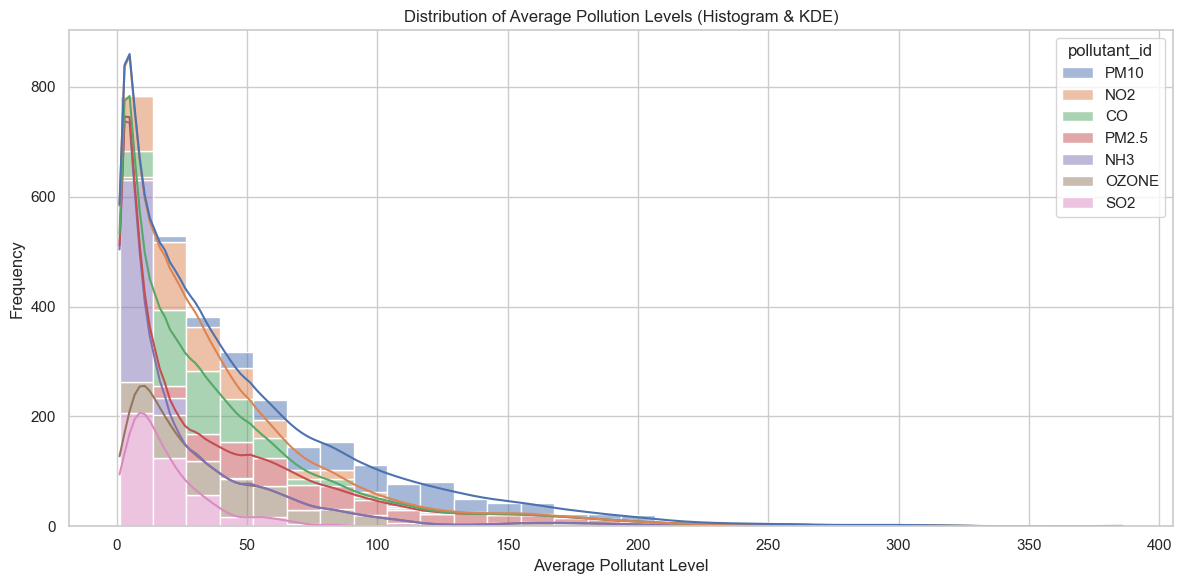

In [29]:
# Visualize distribution of average pollutant levels for all pollutant types
# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='pollutant_avg', hue='pollutant_id', kde=True, bins=30, multiple = 'stack')
plt.title('Distribution of Average Pollution Levels (Histogram & KDE)')
plt.xlabel('Average Pollutant Level')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Objective 2
### State-wise Average Pollution Comparison

In [17]:
print("Pollutants")
print(sorted(df['pollutant_id'].unique()))

Pollutants
['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']


Enter Pollutant Name you want to see data of:  CO


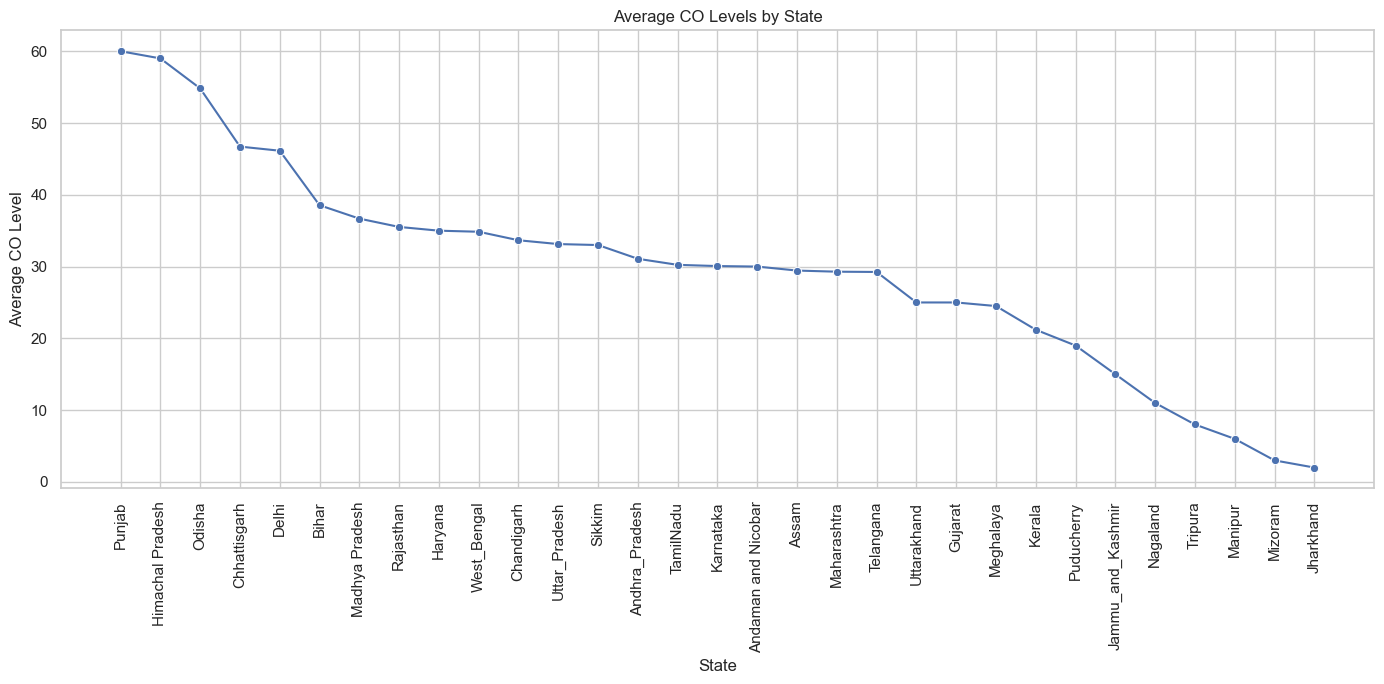

In [18]:
# Choose a specific pollutant
selected_pollutant = input("Enter Pollutant Name you want to see data of: ")

# Filter the data for the selected pollutant
df_selected = df[df['pollutant_id'] == selected_pollutant]

# Group by state and calculate the mean pollutant_avg
state_pollution_avg = df_selected.groupby('state')['pollutant_avg'].mean().reset_index().sort_values(by='pollutant_avg', ascending=False)

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=state_pollution_avg, x='state', y='pollutant_avg', legend=False,marker = 'o')
plt.title(f'Average {selected_pollutant} Levels by State')
plt.xlabel('State')
plt.ylabel(f'Average {selected_pollutant} Level')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Objective 3
### City-wise Average Pollution Comparison (within a state for top N cities)

In [19]:
print("Pollutants")
print(sorted(df['pollutant_id'].unique()))

Pollutants
['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']


In [20]:
print("States")
print(sorted(df['state'].unique()))

States
['Andaman and Nicobar', 'Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']


Enter Pollutant Name you want to see data of:  CO
select State:  Assam
Enter the numbers of cities:  5


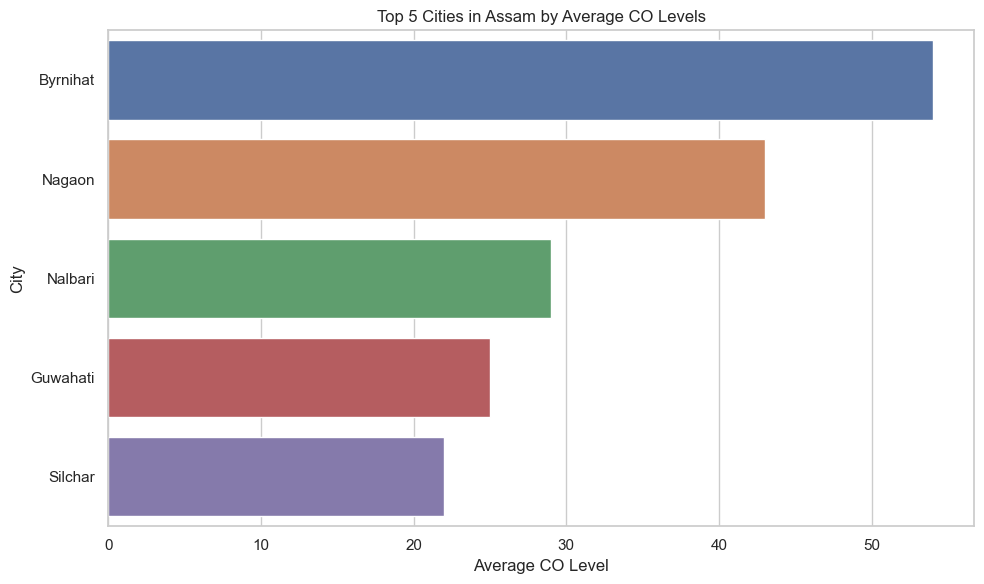

In [21]:
# Choose a specific pollutant and state
selected_pollutant = input("Enter Pollutant Name you want to see data of: ")
selected_state = input("select State: ")

# Filter the data for the selected pollutant and state
df_selected = df[(df['pollutant_id'] == selected_pollutant) & (df['state'] == selected_state)]

# Group by city and calculate the mean of pollutant_avg
city_pollution_avg = df_selected.groupby('city')['pollutant_avg'].mean().reset_index()

# Sort the results in descending order and select the top N cities
N = int(input("Enter the numbers of cities: "))
top_N_cities = city_pollution_avg.sort_values(by='pollutant_avg', ascending=False).head(N)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_N_cities, y='city', x='pollutant_avg', legend=False,hue = 'city')
plt.title(f'Top {N} Cities in {selected_state} by Average {selected_pollutant} Levels')
plt.xlabel(f'Average {selected_pollutant} Level')
plt.ylabel('City')
plt.tight_layout()
plt.show()

# Objectine 4
###  Station-Level Hotspots for particular pollutant for a state or whole nation (Bottom 15 Table)

In [22]:
print("Pollutants")
print(sorted(df['pollutant_id'].unique()))

Pollutants
['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM2.5', 'SO2']


In [23]:
print("States")
df_states = df['state'].unique()
print(sorted(df_states))

States
['Andaman and Nicobar', 'Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']


In [35]:
# Choose a specific pollutant
selected_pollutant = input("Enter Pollutant Name you want to see data of: ")

# Choose a specific state or whole India
region_input = input("Write state name for a state or 'whole_nation' for whole India: ")

# Filter the data for the selected pollutant for state or whole nation
if region_input.lower() == 'whole_nation':
    df_filtered = df[df['pollutant_id'] == selected_pollutant]
else:
    df_filtered = df[(df['pollutant_id'] == selected_pollutant) & (df['state'] == region_input)]

# Group by station to get average pollution levels
hotspot_table = (df_filtered.groupby('station')['pollutant_avg'].mean().reset_index().sort_values(by='pollutant_avg', ascending=True).head(15))
# Display the table
print("Top 15 Least Polluted Stations in ",region_input,"(Based on Average Levels of", selected_pollutant, "):")
display(hotspot_table)

Enter Pollutant Name you want to see data of:  CO
Write state name for a state or 'whole_nation' for whole India:  whole_nation


Top 15 Least Polluted Stations in  whole_nation (Based on Average Levels of CO ):


,station,pollutant_avg
117,"Ghusuri, Howrah - WBPCB",2.0
358,"Sardar Patel Nagar, Dhanbad - JSPCB",2.0
395,"Sikulpuikawn, Aizawl - Mizoram PCB",3.0
318,"Raikhad, Ahmedabad - IITM",5.0
27,"Belur Math, Howrah - WBPCB",5.0
406,"St Joseph College, Tiruchirappalli - TNPCB",6.0
76,"DM College of Science, Imphal - Manipur PCB",6.0
193,"Khindipada-Bhandup West, Mumbai - IITM",6.0
315,"Rachnakar Colony, Aurangabad - MPCB",6.0
130,"Gyaspur, Ahmedabad - IITM",6.0


# Objective 5
### Pollutant Dominance Comparison

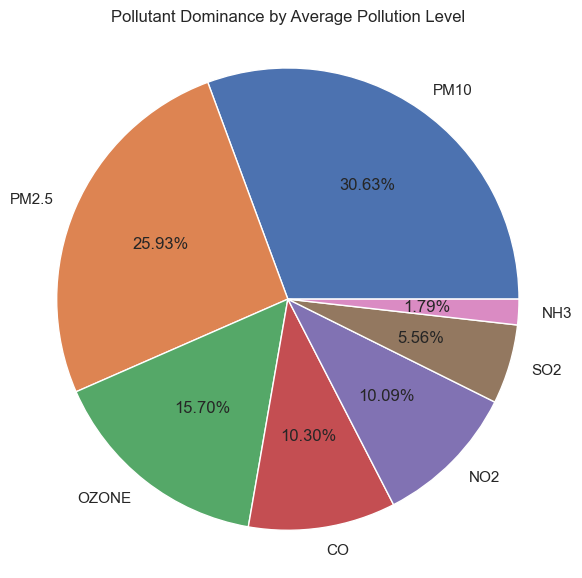

In [25]:
# Group by pollutant and calculate the mean average level
pollutant_avg = df.groupby('pollutant_id')['pollutant_avg'].mean().sort_values(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(pollutant_avg, labels=pollutant_avg.index, autopct='%1.2f%%', startangle=0)
plt.title('Pollutant Dominance by Average Pollution Level')
plt.axis('equal')  # Makes sure the pie chart is a circle
plt.tight_layout()
plt.show()

# Objective 6
### Pollutant Intensity Analysis

Enter the pollutant you want to see:  PM10


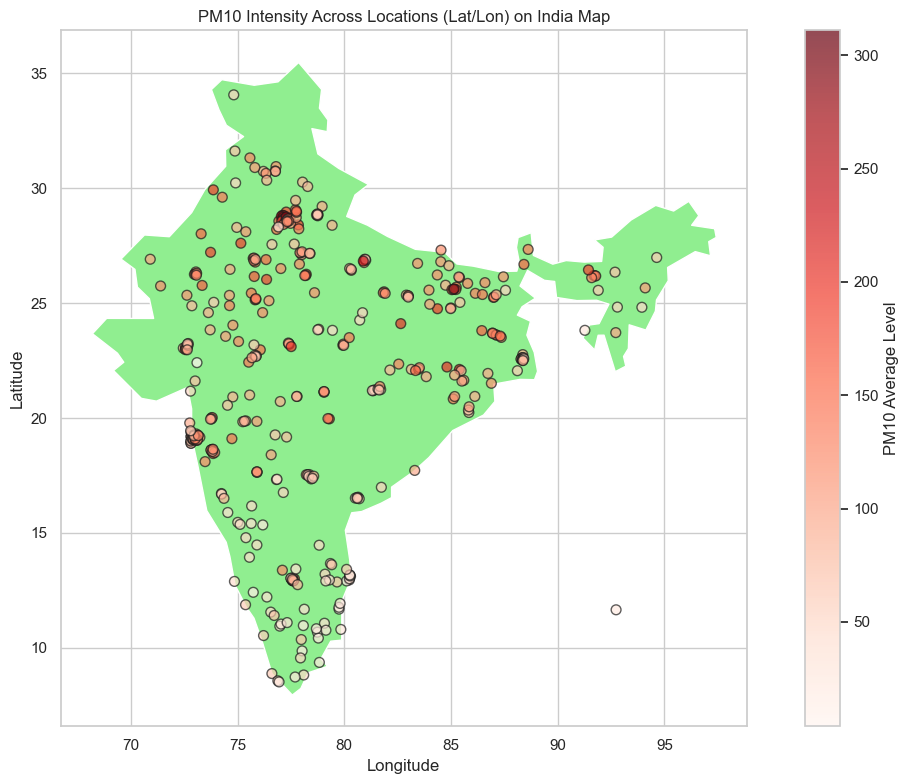

In [37]:
import geopandas as gpd

# Choose a specific pollutant
selected_pollutant = input("Enter the pollutant you want to see: ")

# Filter the data for the selected pollutant
df_selected = df[df['pollutant_id'] == selected_pollutant]

# Load the Shade India map using GeoPandas from the shapefile
india_map = gpd.read_file("ne_110m_admin_0_countries.shp")
india_map = india_map[india_map['NAME'] == 'India']

# Create the scatter plot on top of the map of India
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the map of India
india_map.plot(ax=ax, color='lightgreen')

# Plot the pollution data as a scatter plot
scatter = ax.scatter(df_selected['longitude'], df_selected['latitude'], c=df_selected['pollutant_avg'], cmap='Reds', alpha=0.7, edgecolor='k',
    s=50)

# Add a colorbar to show pollutant intensity
plt.colorbar(scatter, label=f'{selected_pollutant} Average Level')

# Customize the plot title and labels
plt.title(f'{selected_pollutant} Intensity Across Locations (Lat/Lon) on India Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()